In [1]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from ml_utils import train_test_split_marketing,\
    fill_missing,\
    build_encoders,\
    encode_categorical,\
    build_target_encoder,\
    encode_target

df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m14/datasets/bank_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,primary,no,0,no,no,telephone,31,may,664,1,77.0,3,success,no
1,32,technician,married,secondary,no,1242,yes,no,NaN,2,jun,183,3,NaN,0,NaN,no
2,38,blue-collar,single,secondary,no,68,no,no,NaN,5,jun,90,2,NaN,0,NaN,no
3,30,services,single,secondary,no,677,yes,no,cellular,21,nov,108,1,NaN,0,NaN,no
4,66,retired,married,primary,no,2173,no,no,cellular,15,jul,178,1,181.0,5,failure,no


In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split_marketing(df)
X_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,25431.000000,25431.000000,25431.000000,25431.000000,25431.000000,4655.000000,25431.000000
mean,40.913806,1353.540128,15.836381,257.774684,2.780937,226.843824,0.581534
std,10.617230,3018.184488,8.345164,258.556998,3.115439,117.716936,1.928374
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,196.000000,0.000000
75%,48.000000,1403.000000,21.000000,318.000000,3.000000,330.500000,0.000000
max,95.000000,98417.000000,31.000000,3785.000000,63.000000,871.000000,51.000000


# Missing Values

In [3]:
# Fill the missing values using the imported function
X_train_filled = fill_missing(X_train)
X_test_filled = fill_missing(X_test)
X_train_filled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2544,34,blue-collar,married,secondary,no,328,yes,yes,cellular,21,nov,18,7,-1.0,0,nonexistent
3891,30,technician,married,secondary,no,484,yes,no,unknown,6,may,703,1,-1.0,0,nonexistent
19464,42,entrepreneur,divorced,secondary,no,31,no,no,unknown,18,jun,120,1,-1.0,0,nonexistent
31170,27,management,single,tertiary,no,3,yes,yes,cellular,22,jul,506,1,-1.0,0,nonexistent
22216,30,management,single,secondary,no,19,no,no,cellular,26,aug,191,2,-1.0,0,nonexistent


In [4]:
# Create the encoders for categorical variables (use X_train_filled)
encoders = build_encoders(X_train_filled)
encoders

[{'column': 'job',
  'multi_col_output': True,
  'encoder': OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=5,
                sparse_output=False)},
 {'column': 'marital',
  'multi_col_output': True,
  'encoder': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)},
 {'column': 'education',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']],
                 handle_unknown='use_encoded_value', unknown_value=-1)},
 {'column': 'default',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
                 unknown_value=-1)},
 {'column': 'housing',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
                 unknown_value=-1)},
 {'column': 'loan',
  'multi_col_output': False,
  'encoder': OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='us

In [5]:
# Encode X_train_filled and X_test_filled
X_train_encoded = encode_categorical(X_train_filled, encoders)
X_test_encoded = encode_categorical(X_test_filled, encoders)

X_train_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,x0_admin.,x0_blue-collar,x0_management,...,x0_telephone,x0_unknown,x0_nonexistent,x0_other,x0_success,education,default,housing,loan,month
0,34,328,21,18,7,-1.0,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,10.0
1,30,484,6,703,1,-1.0,0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
2,42,31,18,120,1,-1.0,0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
3,27,3,22,506,1,-1.0,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0
4,30,19,26,191,2,-1.0,0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0


In [6]:
# Encode y_train and y_test
y_encoder = build_target_encoder(y_train)
y_train_encoded = encode_target(y_train, y_encoder)
y_test_encoded = encode_target(y_test, y_encoder)

In [7]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 10)
pca_model.fit(X_train_encoded)

X_train_pca = pd.DataFrame(pca_model.transform(X_train_encoded))
X_test_pca = pd.DataFrame(pca_model.transform(X_test_encoded))
X_train_pca

,0,1,2,3,4,5,6,7,8,9
0,-1025.988765,-237.743516,-42.446015,-6.785455,4.690868,3.797788,-4.546534,-0.275035,0.785669,-0.730206
1,-868.747212,446.988688,-39.441988,-10.163080,-10.248229,-0.788051,0.577786,-0.107363,0.361291,-0.731556
2,-1322.800415,-135.197537,-41.887080,1.377091,1.600784,-2.194695,0.125183,-0.133158,0.032686,0.636774
3,-1350.104915,250.848220,-40.248549,-13.707176,5.421199,-1.976660,-1.167776,-0.058309,-1.042868,0.050794
4,-1334.675679,-64.183035,-41.628679,-10.914753,9.278467,-1.524929,-1.911784,-0.109968,-0.337793,0.686235
...,...,...,...,...,...,...,...,...,...,...
25426,-687.882315,-183.353260,-42.298940,14.242951,-0.669797,1.865645,1.631337,-0.210130,0.817291,0.380208
25427,-1352.944852,330.842979,-39.996745,27.291026,7.196923,-2.059314,0.660950,-0.137428,-0.304201,0.340998
25428,-998.451529,58.208809,-41.186623,-6.775564,4.663105,-0.057998,-1.889021,-0.144169,-0.095436,-0.463341
25429,-2040.848914,-161.896518,-41.787111,4.611104,1.783135,-1.233310,0.173506,-0.117076,-0.949004,-1.017121


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_pca, y_train_encoded)

RandomForestClassifier()

In [9]:
y_test_pred = model.predict(X_test_pca)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.6865790998545416


In [10]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=100, max_depth=depth)
    model.fit(X_train_pca, y_train_encoded)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train_encoded, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_encoded, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

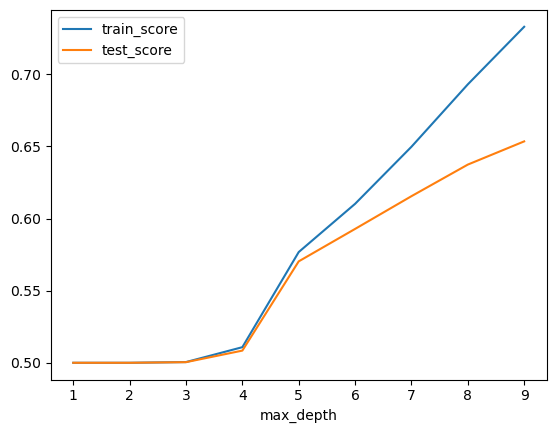

In [11]:
models_df.plot(x='max_depth')

In [12]:
models = {'train_score': [], 'test_score': [], 'n_estimators': []}

for n in [50, 100, 500, 1000]:
    models['n_estimators'].append(n)
    model = RandomForestClassifier(n_estimators=n, max_depth=7)
    model.fit(X_train_pca, y_train_encoded)
    y_test_pred = model.predict(X_test_pca)
    y_train_pred = model.predict(X_train_pca)

    models['train_score'].append(balanced_accuracy_score(y_train_encoded, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_encoded, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='n_estimators'>

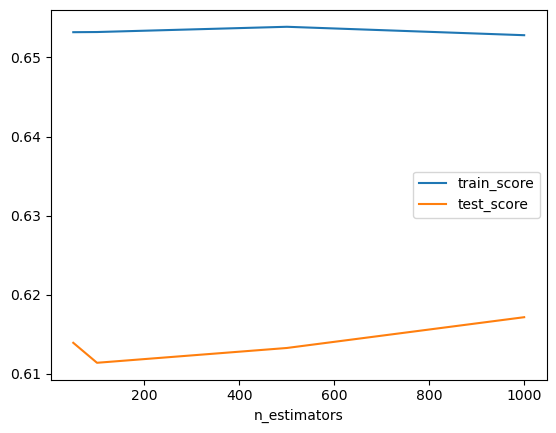

In [13]:
models_df.plot(x='n_estimators')

In [14]:
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

random_knn.fit(X_train_pca, y_train_encoded)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END leaf_size=10, n_neighbors=15, weights=uniform;, score=0.878 total time=   0.2s
[CV 2/5] END leaf_size=10, n_neighbors=15, weights=uniform;, score=0.886 total time=   0.2s
[CV 3/5] END leaf_size=10, n_neighbors=15, weights=uniform;, score=0.884 total time=   0.2s
[CV 4/5] END leaf_size=10, n_neighbors=15, weights=uniform;, score=0.882 total time=   0.2s
[CV 5/5] END leaf_size=10, n_neighbors=15, weights=uniform;, score=0.880 total time=   0.1s
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.847 total time=   0.0s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.853 total time=   0.1s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.859 total time=   0.0s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.851 total time=   0.0s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.847 total time=   0.0s
[CV 1/5] END leaf_s

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [10, 50, 100, 500],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [15]:
y_pred = random_knn.predict(X_test_pca)
print(balanced_accuracy_score(y_test_encoded, y_pred))

0.6095259405410207


In [16]:
model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=13)
model.fit(X_train_encoded, y_train_encoded)
y_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_pred))

0.5753911268989494
